In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [7]:
df["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [8]:
df["mainroad"] = df["mainroad"].map({"yes":1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes":1, "no": 0})
df["basement"] = df["basement"].map({"yes":1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes":1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes":1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes":1, "no": 0})

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

status = pd.get_dummies(df["furnishingstatus"])
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


In [10]:
status = pd.get_dummies(df["furnishingstatus"], drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


In [11]:
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [12]:
df.drop(["furnishingstatus"], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [13]:
df["areaperbedroom"] = df["area"]/df["bedrooms"]
df["bbratio"] = df["bathrooms"]/df["bedrooms"]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [14]:
def normalize(x):
    return ((x-np.min(x))/(max(x) - min(x)))
df = df.apply(normalize)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [16]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio']]
y = df["price"]

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [18]:
import statsmodels.api as sm
Xtrain = sm.add_constant(Xtrain)
model = sm.OLS(ytrain, Xtrain).fit()

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 31 May 2019   Prob (F-statistic):           4.56e-82
Time:                        19:42:07   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059      1.029      0.304      -0.055       0.176
area                0.5745      0.134      4.285      0.000       0.311       0.838
bedrooms           -0.0587      0.093     -0.632      0.528      -0.241       0.124
bathrooms           0.2336      0.126      1.849      0.065      -0.015       0.482
stories             0.1018      0.019      5.265      0.000       0.064       0.140
mainroad            0.0511      0.014      3.580      0.000       0.023       0.079
guestroom           0.0260      0.014      1.887      0.060      -0.001       0.053
basement            0.0208      0.011      1.877      0.061      -0.001       0.043
hotwaterheating     0.0875      0.022      4.048      0.000       0.045       0.130
airconditioning     0.0663      0.011      5.868      0.000       0.044       0.088
parking             0.0562      0.018      3.104      0.002       0.021       0.092
prefarea            0.0566      0.012      4.772      0.000       0.033       0.080
semi-furnished     -0.0008      0.012     -0.068      0.946      -0.024       0.022
unfurnished        -0.0323      0.013     -2.550      0.011      -0.057      -0.007
areaperbedroom     -0.3135      0.147     -2.139      0.033      -0.602      -0.025
bbratio             0.0439      0.104      0.421      0.674      -0.161       0.249
==============================================================================
Omnibus:                       87.283   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.328
Skew:                           1.023   Prob(JB):                     9.91e-61
Kurtosis:                       6.636   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance Inflation Factor 
#### Used for collinearity

In [20]:
def vif_cal(inData, dependCol):
    vif_df = pd.DataFrame(columns=["Var", "Vif"])
    x_vars = inData.drop([dependCol], axis=1)
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-rsq), 2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = "Vif", axis = 0, ascending=False, inplace=False)

In [21]:
vif_cal(inData=df, dependCol="price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


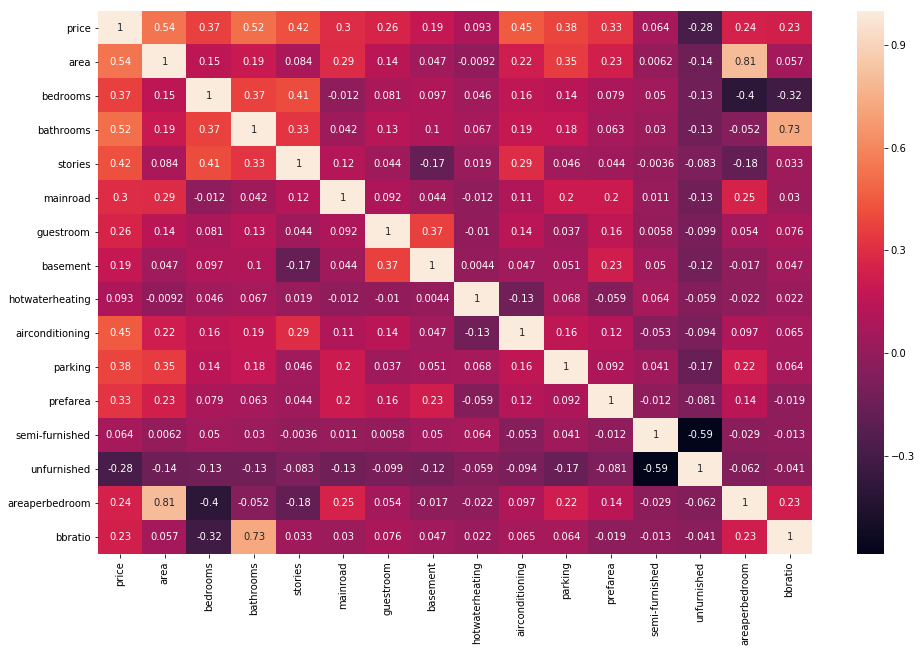

In [22]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot = True)

In [23]:
Xtrain = Xtrain.drop("bbratio", 1)
Xtrain.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom
359,1.0,0.134021,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.131693
19,1.0,0.327835,0.4,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.282843
159,1.0,0.103093,0.4,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.107574
35,1.0,0.367698,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.313930
28,1.0,0.432990,0.8,0.333333,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,0.194404


In [24]:
model2 = sm.OLS(ytrain, Xtrain).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Fri, 31 May 2019   Prob (F-statistic):           6.46e-83
Time:                        19:42:10   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036      2.239      0.026       0.010       0.150
area                0.5483      0.119      4.622      0.000       0.315       0.782
bedrooms           -0.0845      0.070     -1.209      0.227      -0.222       0.053
bathrooms           0.2850      0.033      8.686      0.000       0.220       0.350
stories             0.1022      0.019      5.301      0.000       0.064       0.140
mainroad            0.0509      0.014      3.568      0.000       0.023       0.079
guestroom           0.0265      0.014      1.941      0.053      -0.000       0.053
basement            0.0210      0.011      1.898      0.058      -0.001       0.043
hotwaterheating     0.0866      0.021      4.031      0.000       0.044       0.129
airconditioning     0.0662      0.011      5.871      0.000       0.044       0.088
parking             0.0563      0.018      3.119      0.002       0.021       0.092
prefarea            0.0563      0.012      4.760      0.000       0.033       0.079
semi-furnished     -0.0009      0.012     -0.077      0.939      -0.024       0.022
unfurnished        -0.0323      0.013     -2.554      0.011      -0.057      -0.007
areaperbedroom     -0.2840      0.129     -2.208      0.028      -0.537      -0.031
==============================================================================
Omnibus:                       88.466   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.794
Skew:                           1.034   Prob(JB):                     3.91e-62
Kurtosis:                       6.679   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
vif_cal(inData=df.drop(["bbratio"], axis = 1), dependCol="price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [27]:
Xtrain = Xtrain.drop("bedrooms", 1)
Xtrain.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom
359,1.0,0.134021,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.131693
19,1.0,0.327835,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.282843
159,1.0,0.103093,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.107574
35,1.0,0.367698,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.313930
28,1.0,0.432990,0.333333,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,0.194404


In [28]:
model3 = sm.OLS(ytrain, Xtrain).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.66e-83
Time:                        19:42:10   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018      2.362      0.019       0.007       0.078
area                0.4326      0.070      6.164      0.000       0.295       0.571
bathrooms           0.2814      0.033      8.606      0.000       0.217       0.346
stories             0.1005      0.019      5.224      0.000       0.063       0.138
mainroad            0.0515      0.014      3.611      0.000       0.023       0.080
guestroom           0.0285      0.014      2.101      0.036       0.002       0.055
basement            0.0201      0.011      1.822      0.069      -0.002       0.042
hotwaterheating     0.0850      0.021      3.963      0.000       0.043       0.127
airconditioning     0.0667      0.011      5.909      0.000       0.044       0.089
parking             0.0573      0.018      3.175      0.002       0.022       0.093
prefarea            0.0576      0.012      4.895      0.000       0.034       0.081
semi-furnished   9.202e-06      0.012      0.001      0.999      -0.023       0.023
unfurnished        -0.0313      0.013     -2.478      0.014      -0.056      -0.006
areaperbedroom     -0.1516      0.068     -2.242      0.026      -0.285      -0.019
==============================================================================
Omnibus:                       88.924   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.140
Skew:                           1.041   Prob(JB):                     3.29e-62
Kurtosis:                       6.674   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
Xtrain = Xtrain.drop("areaperbedroom", 1)
Xtrain.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.134021,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0
19,1.0,0.327835,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0
159,1.0,0.103093,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0
35,1.0,0.367698,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0
28,1.0,0.432990,0.333333,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,1.0


In [30]:
model4 = sm.OLS(ytrain, Xtrain).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Fri, 31 May 2019   Prob (F-statistic):           2.35e-83
Time:                        19:42:10   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017      1.795      0.074      -0.003       0.066
area                0.3008      0.039      7.799      0.000       0.225       0.377
bathrooms           0.2947      0.032      9.114      0.000       0.231       0.358
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
Xtrain = Xtrain.drop("semi-furnished", 1)
Xtrain.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.134021,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.0
19,1.0,0.327835,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0
159,1.0,0.103093,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0
35,1.0,0.367698,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0
28,1.0,0.432990,0.333333,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,1.0


In [32]:
model5 = sm.OLS(ytrain, Xtrain).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 31 May 2019   Prob (F-statistic):           2.73e-84
Time:                        19:42:11   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015      2.142      0.033       0.003       0.061
area                0.3006      0.038      7.851      0.000       0.225       0.376
bathrooms           0.2947      0.032      9.132      0.000       0.231       0.358
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif_cal(inData=df.drop(["bbratio", "semi-furnished", "bedrooms", "areaperbedroom"], axis = 1), dependCol="price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [34]:
X_test = sm.add_constant(Xtest)
X_test = X_test.drop(["bbratio", "semi-furnished", "bedrooms", "areaperbedroom"], axis = 1)
ypred = model5.predict(X_test)

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0,0.5,'Housing Price')

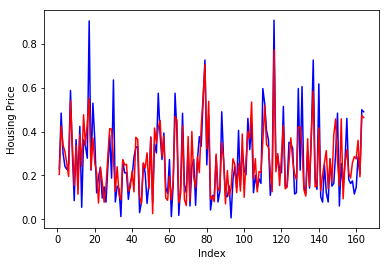

In [35]:
c = [i for i in range(1, 165, 1)]
fig = plt.figure()
plt.plot(c, ytest, color = "blue", linestyle = "-")
plt.plot(c, ypred, color = "red", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Housing Price")

Text(0,0.5,'Error')

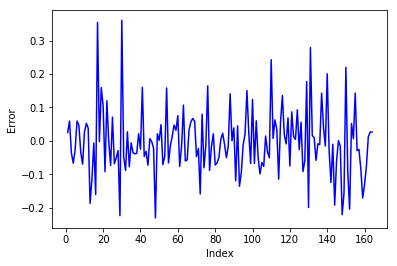

In [36]:
fig = plt.figure()
plt.plot(c, ytest-ypred, color = "blue", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Error")

Text(0,0.5,'Error')

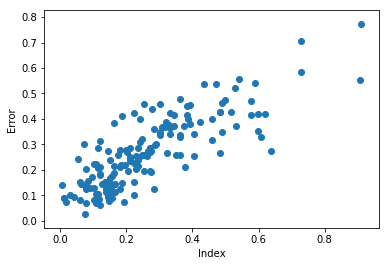

In [37]:
fig = plt.figure()
plt.scatter(ytest,ypred)
plt.xlabel("Index")
plt.ylabel("Error")

C:\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Error')

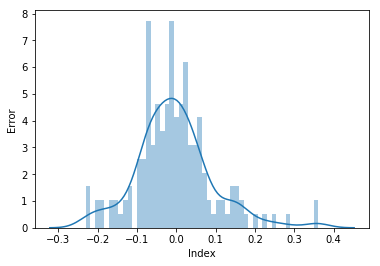

In [39]:
fig = plt.figure()
sns.distplot((ytest-ypred), bins = 50)
plt.xlabel("Index")
plt.ylabel("Error")

In [41]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(ytest, ypred))

0.09834680988986308